# Supervised Machine Learning: Regression

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Display plots inline
%matplotlib inline

In [5]:
# Turn project folder path into a string
path = r'/Users/peterreadman/Desktop/Python Projects/PortfolioProjects/HealthcareSpending/'

In [31]:
# import data

household_df = pd.read_csv(os.path.join(path,'02 Data','02a Original Data','HealthInsurance_Income.csv'))
person_df = pd.read_csv(os.path.join(path,'02 Data','02a Original Data','Per_Med_Expenses.csv'))

### 2. Data Cleaning 

In [32]:
person_df.head()

,Person_ID,Total_OutOfPocket_Med_Exp,Total_OutOfPocket_Med_Exp_2,Medicare_Premium,Ins_Premium,Ins_Premium_2,Non_Premium_OutOfPocket,OverTheCounter_Exp,Retirement_Ann,Retirement_Dist,Earnings_Net,SE_FARM_2nd,SE_FARM_Tot,SE_Tot,SE_2nd,Wages_Tot,Wages_Other,Tot_Per_Earn,Total_Per_Inc
0,2.022090e+21,3840,3840,0,3840,3840,0,0,0,0,44200,0,0,0,0,44200,0,44200,44220
1,2.100060e+21,568,568,0,200,200,320,48,0,0,30000,2500,2500,30100,100,0,0,32600,32702
2,2.100060e+21,1300,1300,0,1200,1200,0,100,0,0,48000,0,0,0,0,48000,0,48000,50050
3,1.410320e+21,100,100,0,0,0,0,100,0,0,40000,0,0,0,0,40000,0,40000,40001
4,1.410320e+21,1400,1400,0,1000,1000,300,100,0,0,20000,0,0,0,0,20000,0,20000,20000


In [33]:
# check for null (0) values in all columns

zero_counts = (person_df == 0).sum()

print(zero_counts)

Person_ID                           0
Total_OutOfPocket_Med_Exp       25708
Total_OutOfPocket_Med_Exp_2     25030
Medicare_Premium               134173
Ins_Premium                    103400
Ins_Premium_2                  100488
Non_Premium_OutOfPocket         58902
OverTheCounter_Exp              39078
Retirement_Ann                 150982
Retirement_Dist                148239
Earnings_Net                    77092
SE_FARM_2nd                    151958
SE_FARM_Tot                    151615
SE_Tot                         147008
SE_2nd                         151127
Wages_Tot                       81305
Wages_Other                    145804
Tot_Per_Earn                    77088
Total_Per_Inc                   46089
dtype: int64


In [34]:
# Drop all rows which have 0 in every column, except Person_ID
per_df = person_df.loc[~(person_df.drop('Person_ID', axis=1) == 0).all(axis=1)]

In [35]:
per_df.shape

(138640, 19)

In [36]:
# check for null (0) values in all columns of new dataframe

zero_counts = (per_df == 0).sum()

print(zero_counts)

Person_ID                           0
Total_OutOfPocket_Med_Exp       11616
Total_OutOfPocket_Med_Exp_2     10938
Medicare_Premium               120081
Ins_Premium                     89308
Ins_Premium_2                   86396
Non_Premium_OutOfPocket         44810
OverTheCounter_Exp              24986
Retirement_Ann                 136890
Retirement_Dist                134147
Earnings_Net                    63000
SE_FARM_2nd                    137866
SE_FARM_Tot                    137523
SE_Tot                         132916
SE_2nd                         137035
Wages_Tot                       67213
Wages_Other                    131712
Tot_Per_Earn                    62996
Total_Per_Inc                   31997
dtype: int64


Explore the differences between 'Total_OutOfPocket_Med_Exp' and 'Total_OutOfPocket_Med_Exp_2' to assess combining them into one column for Total OutOfPocket Med expenses

In [37]:
# Count the number of rows with values > 0 in both columns
both_columns_count = ((per_df['Total_OutOfPocket_Med_Exp'] > 0) & (per_df['Total_OutOfPocket_Med_Exp_2'] > 0)).sum()

# Count the number of rows with the same value in both columns
same_values_count = ((per_df['Total_OutOfPocket_Med_Exp'] == per_df['Total_OutOfPocket_Med_Exp_2']) & (per_df['Total_OutOfPocket_Med_Exp'] > 0) & (per_df['Total_OutOfPocket_Med_Exp_2'] > 0)).sum()

# Count the number of rows with different values in both columns
different_values_count = ((per_df['Total_OutOfPocket_Med_Exp'] != per_df['Total_OutOfPocket_Med_Exp_2']) & (per_df['Total_OutOfPocket_Med_Exp'] > 0) & (per_df['Total_OutOfPocket_Med_Exp_2'] > 0)).sum()

# Count the number of rows with a 0 value in both columns
both_zero_count = ((per_df['Total_OutOfPocket_Med_Exp'] == 0) & (per_df['Total_OutOfPocket_Med_Exp_2'] == 0)).sum()

# Print the results
print("Number of rows with values > 0 in both columns:", both_columns_count)
print("Number of rows with same values > 0 in both columns:", same_values_count)
print("Number of rows with different values > 0 in both columns:", different_values_count)
print("Number of rows with a 0 value in both columns:", both_zero_count)

Number of rows with values > 0 in both columns: 127024
Number of rows with same values > 0 in both columns: 124337
Number of rows with different values > 0 in both columns: 2687
Number of rows with a 0 value in both columns: 10938


### Difference between 'Total_OutOfPocket_Med_Exp' and 'Total_OutOfPocket_Med_Exp_2'
**Total_OutOfPocket_Med_Exp** is a combination of the following out-of-pocket medical expenses:
- Comprehensive and noncomprehensive health insurance premiums
- Over-the-counter health related spending
- Non-premium medical care <br>

**Total_OutOfPocket_Med_Exp_2** is the same except for the first cost:
- Comprehensive and noncomprehensive health insurance premiums – **alternative**
- Over-the-counter health related spending
- Non-premium medical care


It will be necessary to take a view on how to handle these differences. They will be left included for now as it is not known if an amount in one column is in addition to or a duplicate of the amount in the second column

For the purpose of this analysis, only persons with a recorded Income (earnings, other sources of income) will be included

In [38]:
# Drop rows where 'Total_Per_Inc' = 0
p_df = per_df.drop(per_df[per_df['Total_Per_Inc'] == 0].index)

In [39]:
p_df.shape

(106643, 19)

***Missing values*** 

In [42]:
# check for null (0) values in all columns

(p_df == 0).sum()

Person_ID                           0
Total_OutOfPocket_Med_Exp       11552
Total_OutOfPocket_Med_Exp_2     10931
Medicare_Premium                88206
Ins_Premium                     58874
Ins_Premium_2                   56099
Non_Premium_OutOfPocket         33442
OverTheCounter_Exp              21368
Retirement_Ann                 104893
Retirement_Dist                102150
Earnings_Net                    31003
SE_FARM_2nd                    105869
SE_FARM_Tot                    105526
SE_Tot                         100919
SE_2nd                         105038
Wages_Tot                       35216
Wages_Other                     99715
Tot_Per_Earn                    30999
Total_Per_Inc                       0
dtype: int64

**Approximately 10% of persons in the data set have 0 total out-of-pocket medical expenses recorded.**
It is unknown if all or any of these are records of zero expenses or if they are unknown (respondent didn't answer the question)
- they will be left in for now but will need further investigation 

***Duplicates check***

In [50]:
dups = p_df.duplicated()

In [49]:
dups.shape

(106643,)

**No duplicates!**

***Extreme values checks***

/Users/peterreadman/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_OutOfPocket_Med_Exp', ylabel='Density'>

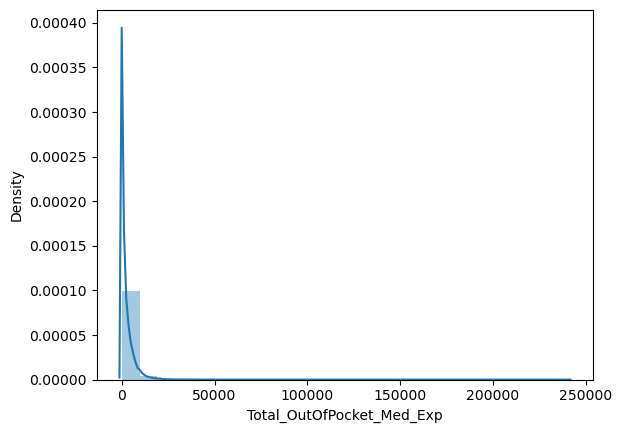

In [56]:
# plot distribution of total out of pocket costs

sns.distplot(p_df['Total_OutOfPocket_Med_Exp'], bins=25)


There are a few extremely high out-of-pocket expenses. These will be left in the analysis for now as there is no reason to doubt their authenticity.

In [57]:
# Check the mean out-of-pocket-expenses
p_df['Total_OutOfPocket_Med_Exp'].mean()

2351.8795982858696

In [58]:
# Check the median out-of-pocket-expenses
p_df['Total_OutOfPocket_Med_Exp'].median()

860.0

In [59]:
# Check the max out-of-pocket-expenses
p_df['Total_OutOfPocket_Med_Exp'].max()

240437

### 3. Data prep for regression analysis 

Explore the relationship between individual's total income and total out-of-pocket medical expenditure

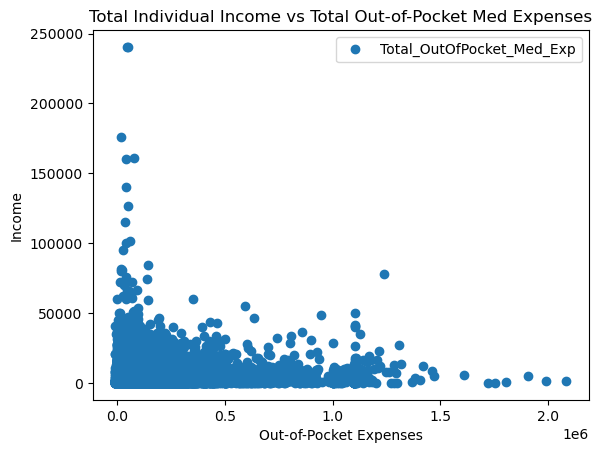

In [61]:
# Create a scatterplot to look at how total income and total out-of-pocket expenses plot against each other.

p_df.plot(x = 'Total_Per_Inc', y='Total_OutOfPocket_Med_Exp',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Individual Income vs Total Out-of-Pocket Med Expenses')  
plt.xlabel('Out-of-Pocket Expenses')  
plt.ylabel('Income')  
plt.show()

### Hypothesis
**Persons with a higher total income pay less in out-of-pocket medical expenses**
<br>
This hypothesis is based off the following assumptions"
- health insurance coverage in the US is strongly connected to employment and salary level
- persons with higher salaries will likely also have more comprehensive insurance coverage, reducing direct out-of-pocket costs to the individual

In [63]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = p_df['Total_Per_Inc'].values.reshape(-1,1)
y = p_df['Total_OutOfPocket_Med_Exp'].values.reshape(-1,1)

In [66]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis


In [69]:
# Create a regression object.

regression = LinearRegression()

In [70]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [71]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

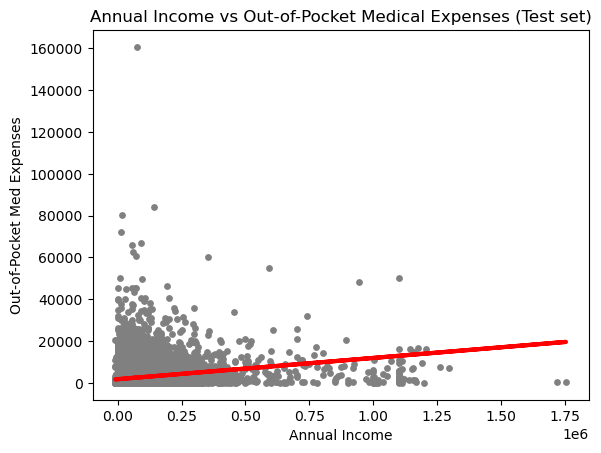

In [76]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='grey', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Annual Income vs Out-of-Pocket Medical Expenses (Test set)')
plot_test.xlabel('Annual Income')
plot_test.ylabel('Out-of-Pocket Med Expenses')
plot_test.show()

**Interpretation**
The regression line does not appear to fit the data well. The data points look to the eye like there would be a slight slope downwards but instead there is a slight slope upwards. Outliers of extremely high out-of-pocket costs and extremely high income levels are likely having an influence on the regression. 

In [74]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [75]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01017177]]
Mean squared error:  14559439.129261678
R2 score:  0.042574136670652685


In [77]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2800,2412.338229
1,120,1911.836122
2,1726,2006.840485
3,2500,2084.064588
4,1200,1780.630418
5,3900,2696.191736
6,100,2192.007447
7,10500,4857.591852
8,450,2340.118638
9,300,2008.874840


**The predicted values are way off the actual!**

The model's predicted values show notable disparities when compared to the actual values, indicating a significant deviation between the estimated outcomes and the observed data points.

## Hypothesis Evaluation
**Persons with a higher total income pay less in out-of-pocket medical expenses**

- The regression analysis reveals a weak positive relationship between Total Income and Total out-of-pocket medical expenses. The increase in Total Income is associated with a minimal, almost negligible, increase in medical expenses.
- The mean squared error highlights the need for further improvement in the model's predictions of medical expenses, as there is still considerable unexplained variability in the data.
- With an R2 score of approximately 0.0426, it becomes evident that Total Income explains only a small fraction of the variation in medical expenses. Other factors beyond Total Income are likely to play a more substantial role in determining an individual's out-of-pocket medical expenses.

The evaluation of the regression results reveals that there is almost no discernible link between an increase in income and a reduction in out-of-pocket medical expenses. This finding suggests that the ability of individuals to pay for medical costs, as reflected by their income, is largely unrelated to the actual costs incurred, highlighting a lack of association between financial means and medical expenditure in the context of the analyzed dataset.
<br>
#### Reflections on possible data bias
In analyzing the ASEC data set, it is important to consider the potential for selection bias, as the data may only capture information from individuals who participated in the survey, potentially excluding certain demographic groups or individuals with unique characteristics.<br>
<br>
Additionally, nonresponse bias could arise if there are systematic differences between respondents and non-respondents, leading to a limited representation of the overall population and potential distortions in the conclusions drawn from the data.

### Compare how the regression fits the training set

In [78]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [79]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [80]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01017177]]
Mean squared error:  16608224.774227427
R2 score:  0.03934683150359153


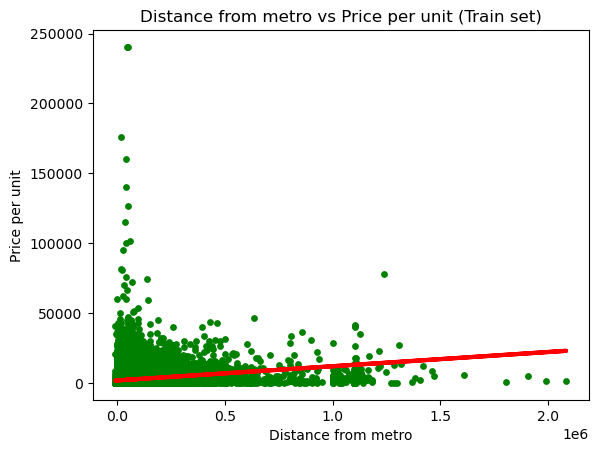

In [81]:
# plot the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Distance from metro vs Price per unit (Train set)')
plot_test.xlabel('Distance from metro')
plot_test.ylabel('Price per unit')
plot_test.show()